### 1. Install Dependencies and Setup

In [1]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### 2. Removing Dodgy Images

In [22]:
import cv2
import imghdr
import matplotlib.pyplot as plt
data_dir='Data'
img_exts=['png','jpg','jpeg']

In [36]:
img=cv2.imread(os.path.join('Data','happy','1HEoLBLidT2u4mhJ0oiDgig.png'))
img.shape

(933, 1400, 3)

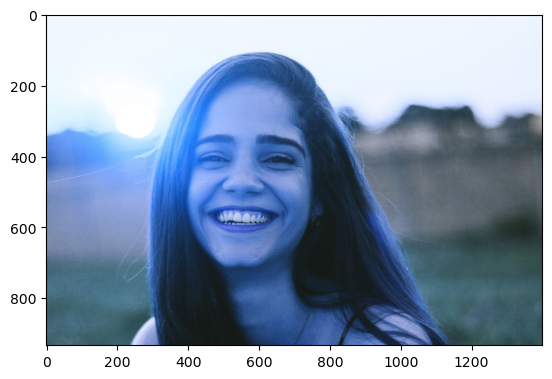

In [37]:
plt.imshow(img)

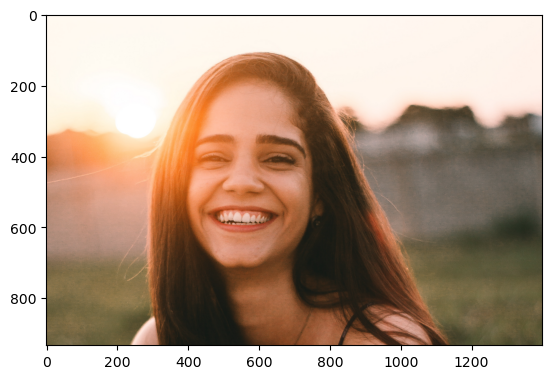

In [38]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [39]:
from glob import glob
class_dirs = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]

for img_class in class_dirs:
    print(img_class)
    class_path = os.path.join(data_dir, img_class)

    # Use glob to directly get files with specified extensions
    img_files = glob(os.path.join(class_path, '*.*'))

    for img_path in img_files:
        try:
            img = cv2.imread(img_path)
            tip = imghdr.what(img_path)

            if tip not in img_exts:
                print(f"Image not in proper extension: {img_path}")
                
                os.remove(img_path)

        except Exception as e:
            print(f"Issue with image: {img_path}")


happy
sad


### 3. Load Data

In [40]:
data=tf.keras.utils.image_dataset_from_directory('Data')

Found 305 files belonging to 2 classes.


In [41]:
data_iterator=data.as_numpy_iterator()

In [42]:
data_iterator

In [47]:
batch=data_iterator.next()
len(batch)

2

In [48]:
#Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [49]:
#labels
# class -1 Sad and class - 0 Happy
batch[1]

array([1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1], dtype=int32)

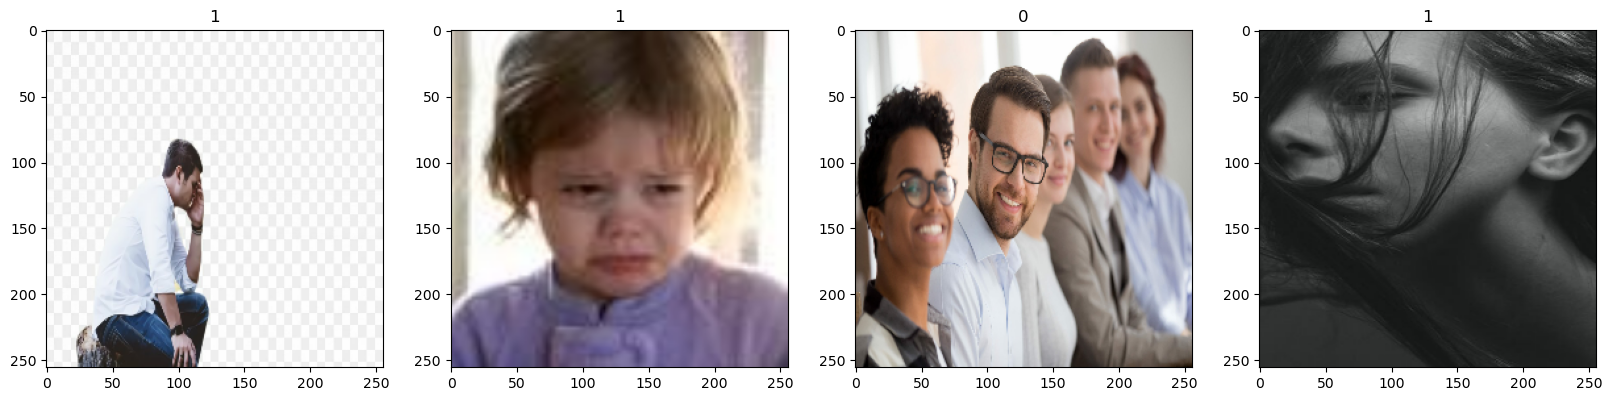

In [50]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [63]:
data=tf.keras.utils.image_dataset_from_directory('Data')

Found 305 files belonging to 2 classes.


### 4. Scale Data

In [64]:
data=data.map(lambda x,y:(x/255,y))
scaled_iterator=data.as_numpy_iterator()

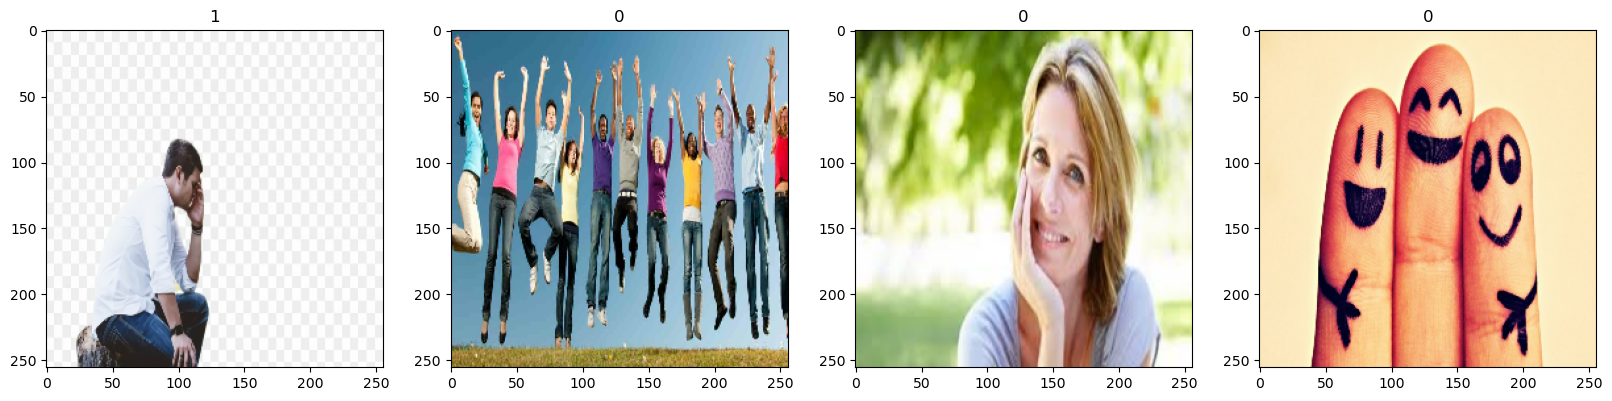

In [61]:
batch=scaled_iterator.next()
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [65]:
len(data)

10

### 5. Split Data

In [66]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [71]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

### Building Deep Learning Model


In [72]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [74]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [75]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [76]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

### 7. Train

In [77]:
logdir='logs'


In [78]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [79]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/20


loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x32x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x32x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceSh

7/7 [==============================] - ETA: 0s - loss: 1.3082 - accuracy: 0.4821

loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x32x1x1xi1>'
loc("mps_select"("(mpsFileLoc): /AppleInternal/Library/BuildRoots/75428952-3aa4-11ee-8b65-46d450270006/Library/Caches/com.apple.xbs/Sources/MetalPerformanceShadersGraph/mpsgraph/MetalPerformanceShadersGraph/Core/Files/MPSGraphUtilities.mm":294:0)): error: 'anec.gain_offset_control' op result #0 must be 4D/5D memref of 16-bit float or 8-bit signed integer or 8-bit unsigned integer values, but got 'memref<1x32x1x1xi1>'


7/7 [==============================] - 12s 639ms/step - loss: 1.3082 - accuracy: 0.4821 - val_loss: 0.6579 - val_accuracy: 0.5312
Epoch 2/20
7/7 [==============================] - 4s 428ms/step - loss: 0.6605 - accuracy: 0.5491 - val_loss: 0.6263 - val_accuracy: 0.7344
Epoch 3/20
7/7 [==============================] - 4s 384ms/step - loss: 0.6279 - accuracy: 0.5982 - val_loss: 0.6056 - val_accuracy: 0.8125
Epoch 4/20
7/7 [==============================] - 4s 379ms/step - loss: 0.5938 - accuracy: 0.7768 - val_loss: 0.5668 - val_accuracy: 0.7344
Epoch 5/20
7/7 [==============================] - 5s 539ms/step - loss: 0.4927 - accuracy: 0.7991 - val_loss: 0.5917 - val_accuracy: 0.7344
Epoch 6/20
7/7 [==============================] - 5s 482ms/step - loss: 0.4403 - accuracy: 0.8304 - val_loss: 0.5365 - val_accuracy: 0.7344
Epoch 7/20
7/7 [==============================] - 5s 459ms/step - loss: 0.4890 - accuracy: 0.7589 - val_loss: 0.4015 - val_accuracy: 0.8750
Epoch 8/20
7/7 [==============

### 8. Plot Performance

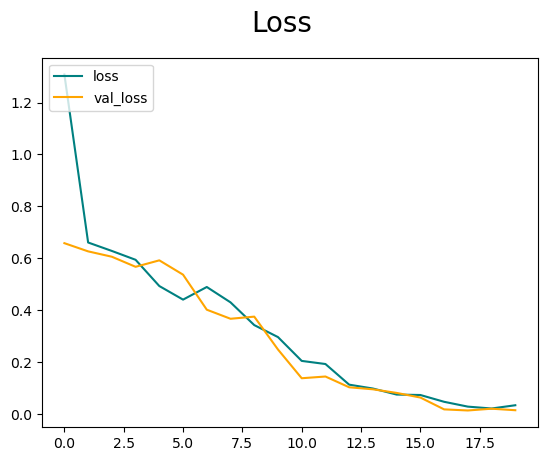

In [80]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

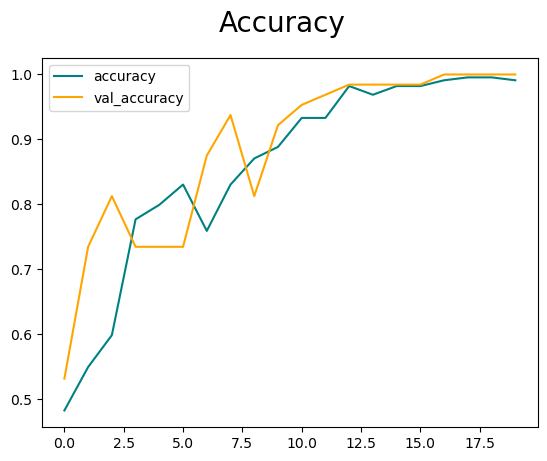

In [81]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

### 9. Evaluate

In [83]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [84]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [85]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 1s/step


In [89]:
print(pre.result().numpy()
, re.result().numpy()
, acc.result().numpy()
)

1.0 1.0 1.0


### 10. Test

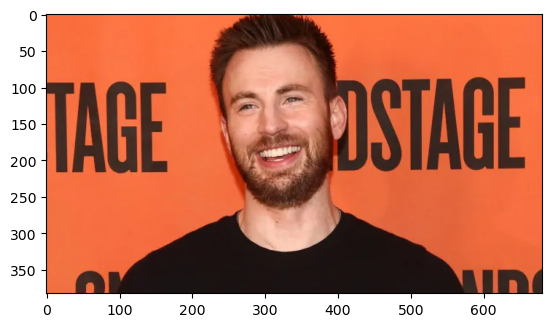

In [107]:
img = cv2.imread('happy_test.png')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

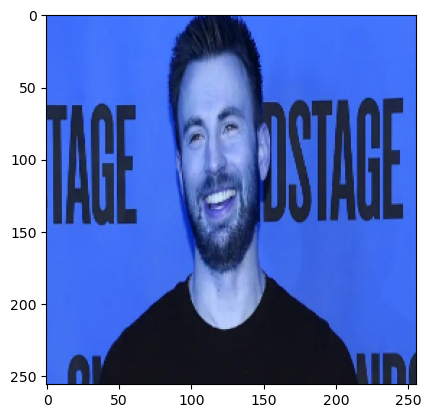

In [108]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [111]:
def class_pred(y):
    if yhat > 0.5: 
        print(f'Predicted class is Sad')
    else:
        print(f'Predicted class is Happy')

In [109]:
import numpy as np
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 18ms/step


array([[0.03455482]], dtype=float32)

In [112]:
class_pred(yhat)

Predicted class is Happy


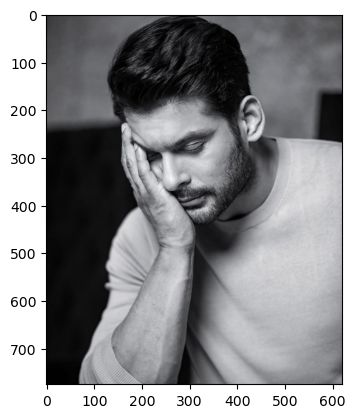

In [114]:
img = cv2.imread('sad_test.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

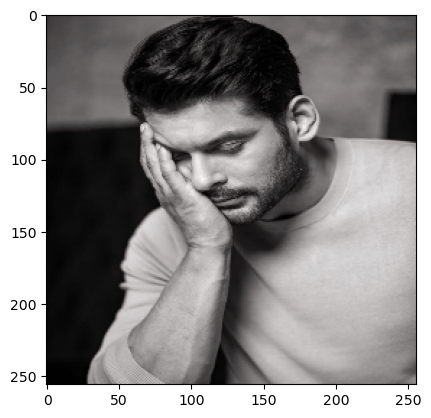

In [115]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [116]:
import numpy as np
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 17ms/step


array([[0.999627]], dtype=float32)

In [117]:
class_pred(yhat)

Predicted class is Sad


### 11. Save the Model


In [118]:
from tensorflow.keras.models import load_model
model.save(os.path.join('models','happy_or_sad.h5'))

In [120]:
new_model = load_model(os.path.join('models','happy_or_sad.h5'))



In [121]:
new_model

In [122]:
import numpy as np
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 86ms/step


array([[0.999627]], dtype=float32)

In [123]:
class_pred(yhat)

Predicted class is Sad
